In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/birdclef-2024/sample_submission.csv
/kaggle/input/birdclef-2024/eBird_Taxonomy_v2021.csv
/kaggle/input/birdclef-2024/train_metadata.csv
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1872382287.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/161691311.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/884633066.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1675425185.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1469579221.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1564606141.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/194233408.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/2003586554.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1459749597.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/33854460.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1163678028.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/1682474551.ogg
/kaggle/input/birdclef-2024/unlabeled_soundscapes/825970922.ogg
/kaggle/inp

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/kaggle/input/birdclef-2024/eBird_Taxonomy_v2021.csv")

In [5]:
df.head()

,TAXON_ORDER,CATEGORY,SPECIES_CODE,PRIMARY_COM_NAME,SCI_NAME,ORDER1,FAMILY,SPECIES_GROUP,REPORT_AS
0,1,species,ostric2,Common Ostrich,Struthio camelus,Struthioniformes,Struthionidae (Ostriches),Ostriches,NaN
1,6,species,ostric3,Somali Ostrich,Struthio molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
2,7,slash,y00934,Common/Somali Ostrich,Struthio camelus/molybdophanes,Struthioniformes,Struthionidae (Ostriches),NaN,NaN
3,8,species,grerhe1,Greater Rhea,Rhea americana,Rheiformes,Rheidae (Rheas),Rheas,NaN
4,14,species,lesrhe2,Lesser Rhea,Rhea pennata,Rheiformes,Rheidae (Rheas),NaN,NaN


In [6]:
df.describe()

,TAXON_ORDER
count,16753.000000
mean,16654.013013
std,10185.185315
min,1.000000
25%,7450.000000
50%,15976.000000
75%,25734.000000
max,35000.000000


In [7]:
data=pd.read_csv("/kaggle/input/birdclef-2024/train_metadata.csv")

In [8]:
data.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg


In [9]:
data.describe()

,latitude,longitude,rating
count,24081.000000,24081.000000,24459.000000
mean,32.537040,43.640699,3.843493
std,19.440382,50.191352,1.100840
min,-43.524000,-171.765400,0.000000
25%,17.160100,2.545700,3.000000
50%,37.155100,26.687600,4.000000
75%,49.114400,85.319300,5.000000
max,71.964000,177.447800,5.000000


In [10]:
data.isnull().sum()

primary_label         0
secondary_labels      0
type                  0
latitude            378
longitude           378
scientific_name       0
common_name           0
author                0
license               0
rating                0
url                   0
filename              0
dtype: int64

In [11]:
df.isnull().sum()

TAXON_ORDER             0
CATEGORY                0
SPECIES_CODE            0
PRIMARY_COM_NAME        0
SCI_NAME                0
ORDER1                  2
FAMILY                 13
SPECIES_GROUP       16537
REPORT_AS           12877
dtype: int64

***Performing EDA (data)***

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


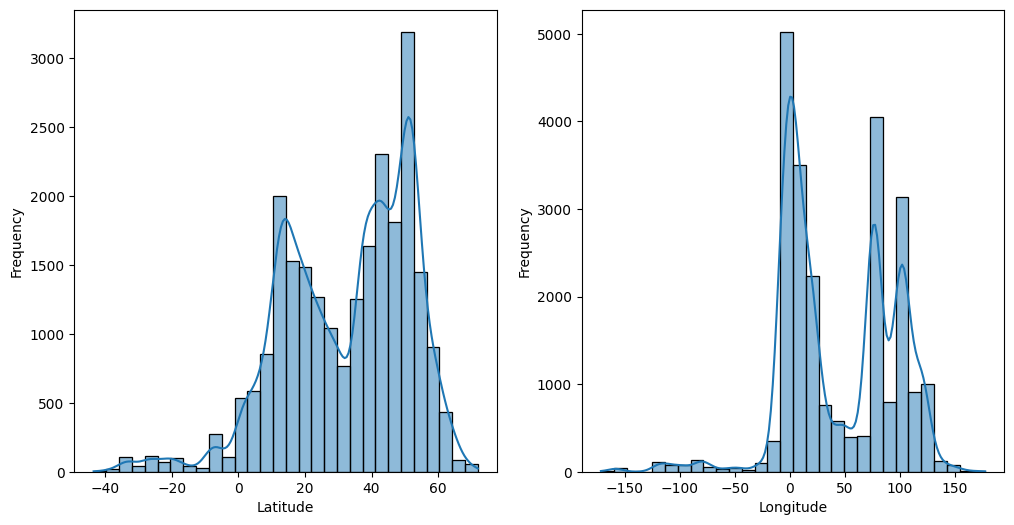

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


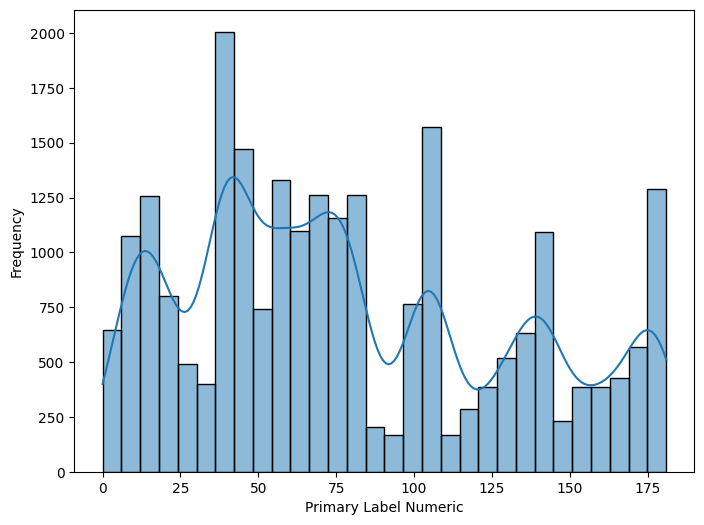

Correlation Matrix:
                       latitude  longitude  primary_label_numeric
latitude               1.000000  -0.504454              -0.117547
longitude             -0.504454   1.000000               0.084145
primary_label_numeric -0.117547   0.084145               1.000000


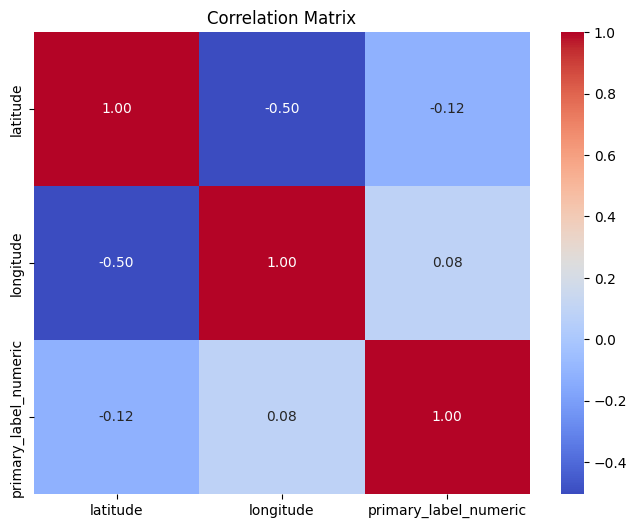

In [42]:

data.dropna(subset=['latitude', 'longitude', 'primary_label_numeric'], inplace=True)

# Visualize the distribution of latitude and longitude coordinates
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['latitude'], bins=30, kde=True)
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(data['longitude'], bins=30, kde=True)
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['primary_label_numeric'], bins=30, kde=True)
plt.xlabel('Primary Label Numeric')
plt.ylabel('Frequency')
plt.show()

# Calculate the correlation between latitude, longitude, and the target variable
correlation_matrix = data[['latitude', 'longitude', 'primary_label_numeric']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Therefore Latitude and longitude alone are not very good aspects for estimation of 

**Latitude Vs Longitude (Density Scatter Plot)**

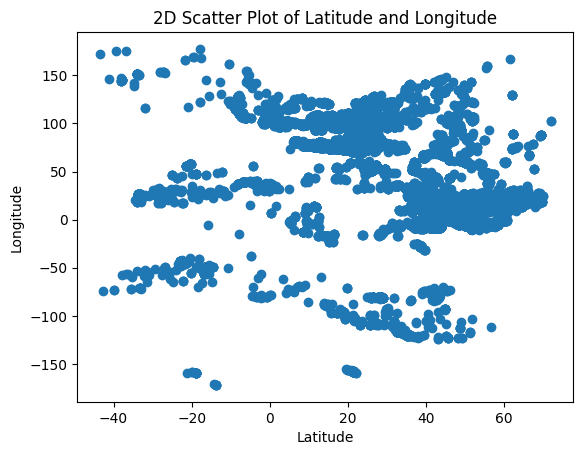

In [43]:
latitude = data['latitude']
longitude = data['longitude']

plt.scatter(latitude, longitude)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('2D Scatter Plot of Latitude and Longitude')
plt.show()

**ScatterPlot World Map Distribution**

In [44]:
import geopandas as gpd
from shapely.geometry import Point


/opt/conda/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:131: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/tmp/ipykernel_33/3054085231.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


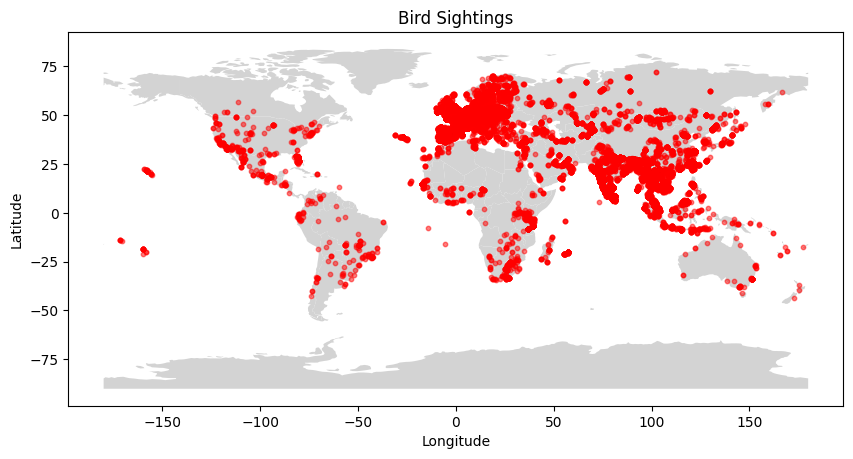

In [45]:
data['geometry'] = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = gpd.GeoDataFrame(data, geometry='geometry')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey')

gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5)

ax.set_title('Bird Sightings')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [46]:
data.head(2)

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename,geometry,primary_label_numeric,cluster
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg,POINT (118.1987 39.2297),0,0
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg,POINT (104.6401 51.403),0,1


In [47]:
data['primary_label_numeric'], _ = pd.factorize(data['primary_label'])

In [48]:
data.iloc[247:250]

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename,geometry,primary_label_numeric,cluster
253,ashpri1,"['compea', 'spodov']",['song'],6.4682,80.8905,Prinia socialis,Ashy Prinia,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/453353,ashpri1/XC453353.ogg,POINT (80.8905 6.4682),2,3
254,ashpri1,[],['song'],18.4070,74.0382,Prinia socialis,Ashy Prinia,Rajgopal Patil,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/464269,ashpri1/XC464269.ogg,POINT (74.0382 18.407),2,3
255,ashpri1,[],['call'],13.0126,80.2761,Prinia socialis,Ashy Prinia,Vivek Puliyeri,Creative Commons Attribution-NonCommercial-Sha...,3.0,https://www.xeno-canto.org/469462,ashpri1/XC469462.ogg,POINT (80.2761 13.0126),2,3


**Latitude vs Longitude with Color based on Primary Label Numeric**

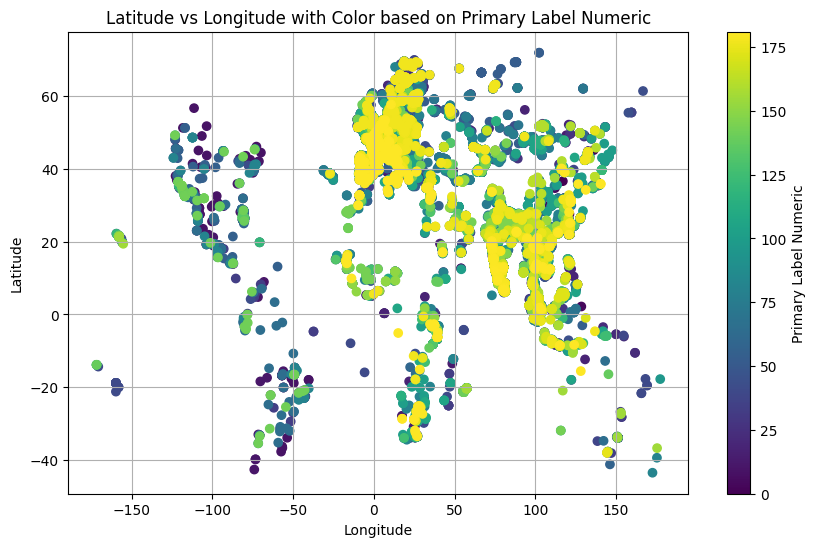

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(data['longitude'], data['latitude'], c=data['primary_label_numeric'], cmap='viridis')
plt.colorbar(label='Primary Label Numeric')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude with Color based on Primary Label Numeric')
plt.grid(True)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

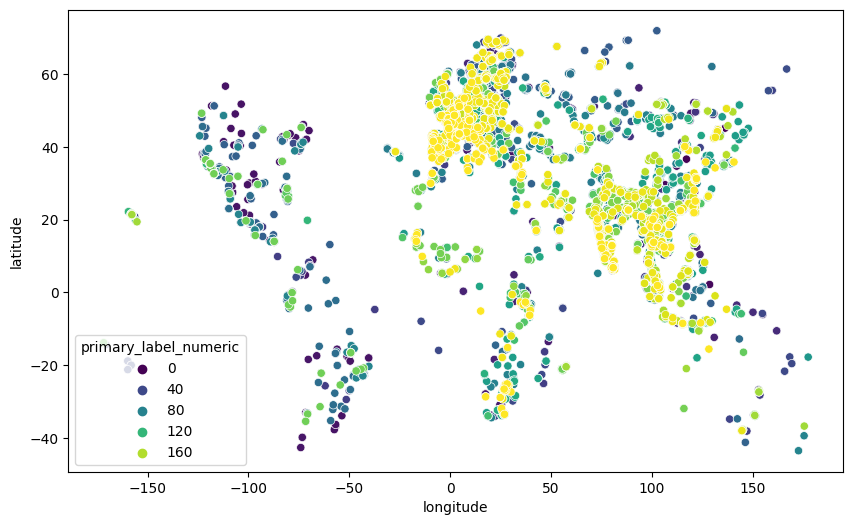

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='primary_label_numeric', data=data, palette='viridis')

In [51]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [52]:
data.dropna(subset=['latitude', 'longitude'], inplace=True)

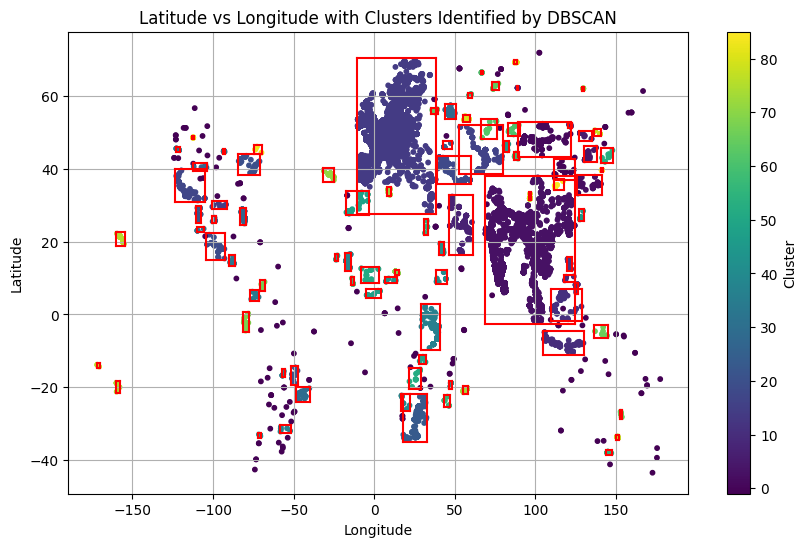

In [53]:
X = data[['latitude', 'longitude']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)

# Fit DBSCAN to the scaled data
dbscan.fit(X_scaled)

# Add cluster labels to the DataFrame
data['cluster'] = dbscan.labels_

# Plot latitude vs longitude with color based on cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis', s=10)

# Define extra padding width
padding = 0.5  # Adjust as needed

# Draw bounding boxes around clusters with extra padding
for cluster_label in data['cluster'].unique():
    if cluster_label == -1:  # Skip noise points
        continue
    
    # Get points belonging to the current cluster
    cluster_points = data[data['cluster'] == cluster_label][['latitude', 'longitude']]
    
    # Calculate minimum and maximum latitude and longitude with extra padding
    min_lat, max_lat = cluster_points['latitude'].min() - padding, cluster_points['latitude'].max() + padding
    min_lon, max_lon = cluster_points['longitude'].min() - padding, cluster_points['longitude'].max() + padding
    
    # Draw rectangle
    plt.plot([min_lon, max_lon], [min_lat, min_lat], color='red')  # Top
    plt.plot([max_lon, max_lon], [min_lat, max_lat], color='red')  # Right
    plt.plot([min_lon, max_lon], [max_lat, max_lat], color='red')  # Bottom
    plt.plot([min_lon, min_lon], [min_lat, max_lat], color='red')  # Left

plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude with Clusters Identified by DBSCAN')
plt.grid(True)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

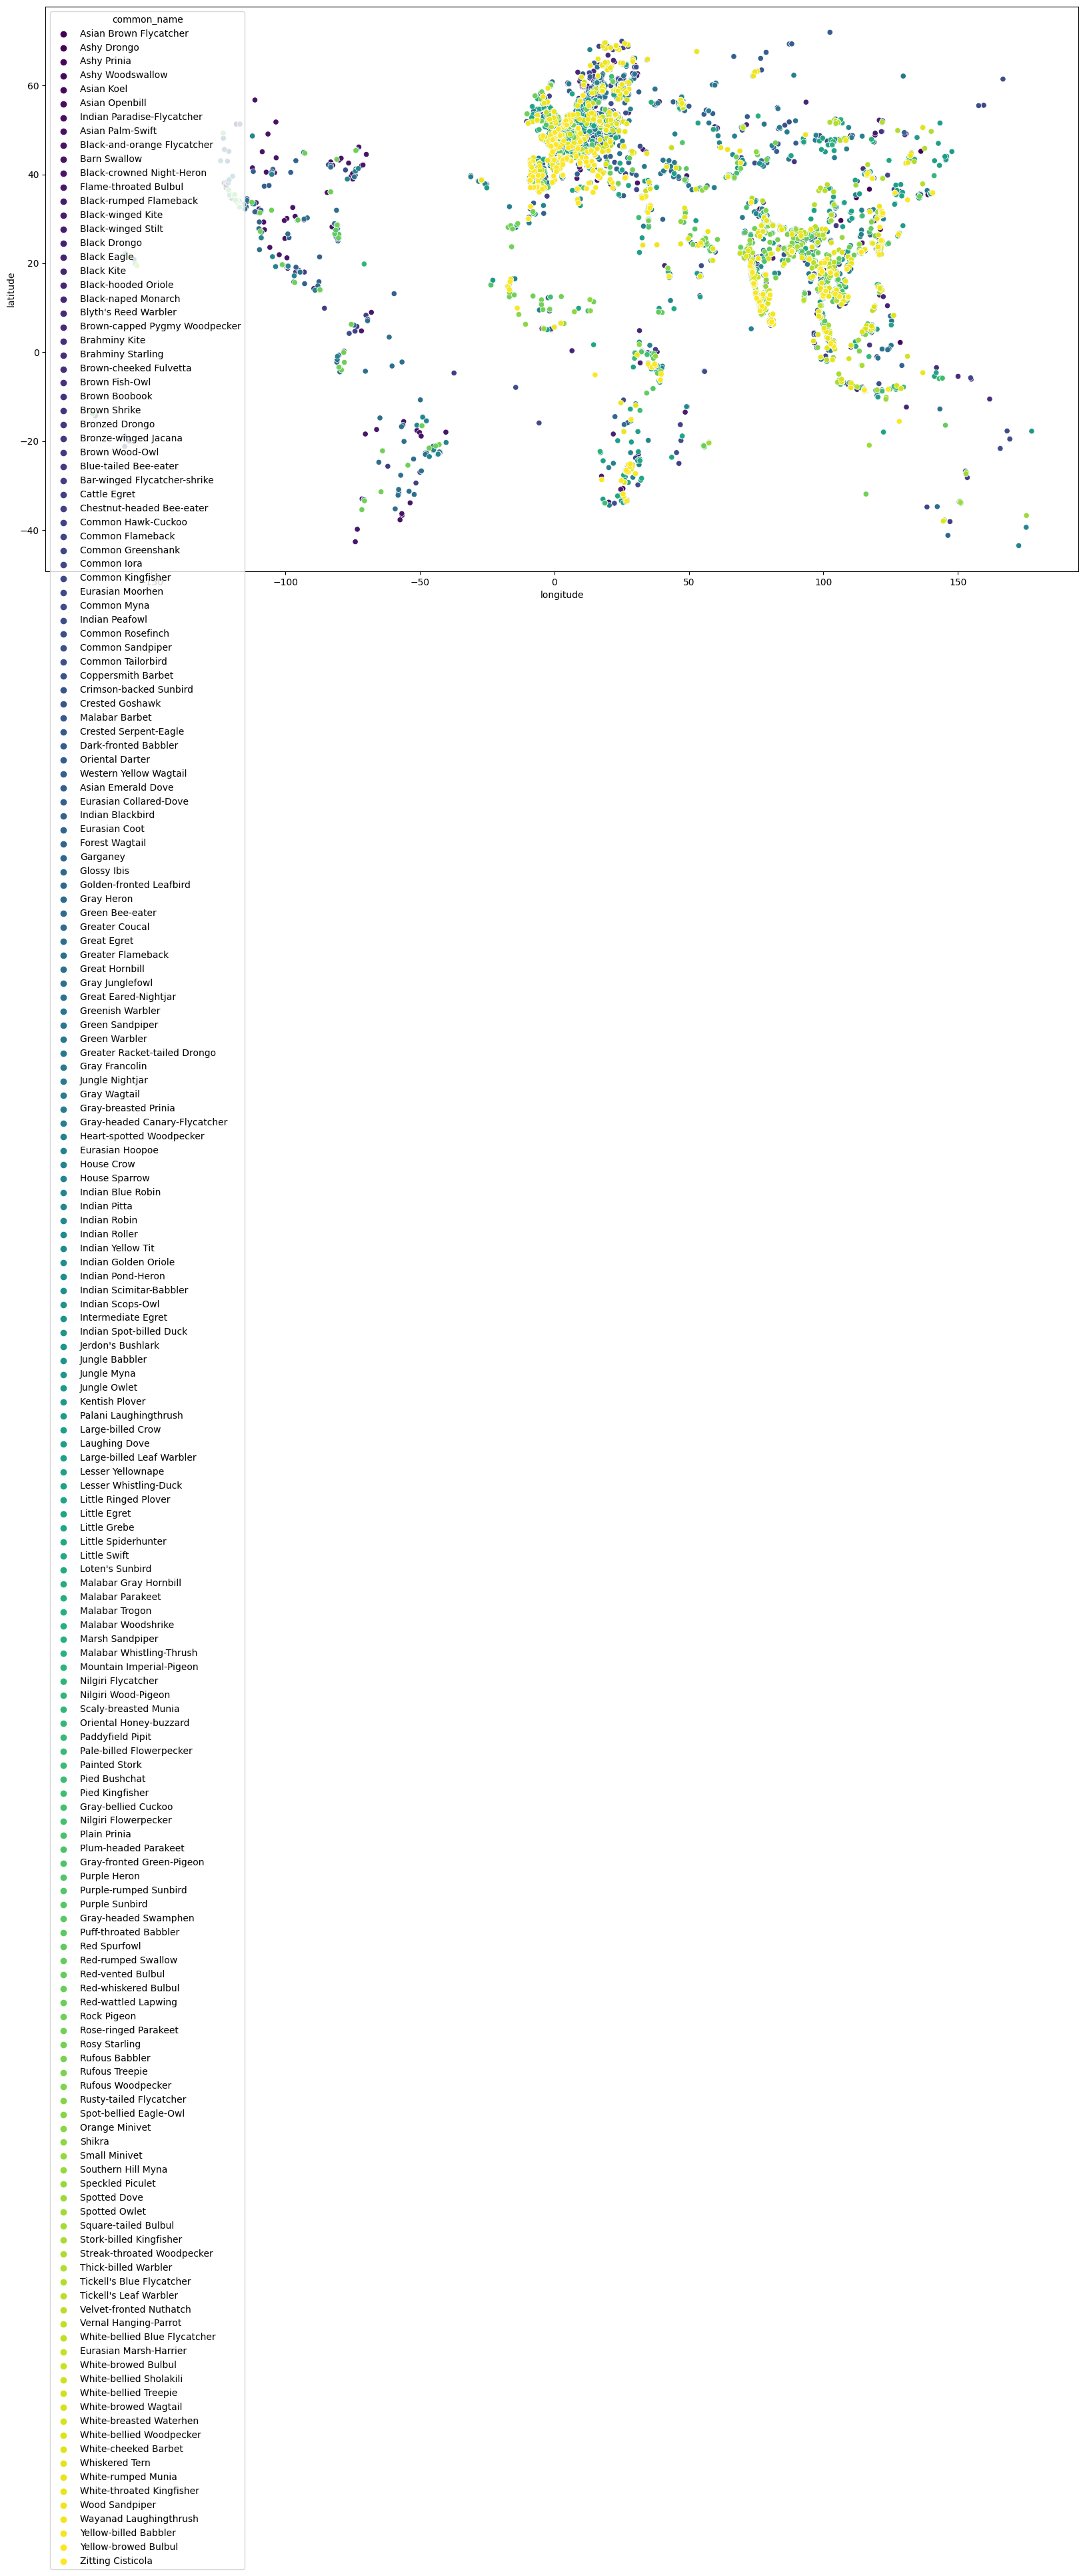

In [67]:
plt.figure(figsize=(20, 11))
sns.scatterplot(x='longitude', y='latitude', hue='common_name', data=data, palette='viridis')

**Dealing With Audio**

In [35]:
import librosa

In [37]:
def extract_audio_features(audio_file_path, sr=22050, n_mfcc=13):
    """
    Extracts common audio features from an audio file.

    Parameters:
    - audio_file_path (str): Path to the audio file.
    - sr (int): Sampling rate (default is 22050 Hz).
    - n_mfcc (int): Number of Mel-Frequency Cepstral Coefficients to extract (default is 13).

    Returns:
    - features (dict): A dictionary containing the extracted audio features.
    """

    # Load the audio file
    y, sr = librosa.load(audio_file_path, sr=sr)

    # Extract features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms_energy = librosa.feature.rms(y=y)

    # Calculate statistics for each feature
    features = {
        'mfcc_mean': np.mean(mfccs, axis=1),
        'mfcc_std': np.std(mfccs, axis=1),
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_centroid_std': np.std(spectral_centroid),
        'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
        'spectral_bandwidth_std': np.std(spectral_bandwidth),
        'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
        'zero_crossing_rate_std': np.std(zero_crossing_rate),
        'spectral_rolloff_mean': np.mean(spectral_rolloff),
        'spectral_rolloff_std': np.std(spectral_rolloff),
        'chroma_stft_mean': np.mean(chroma_stft, axis=1),
        'chroma_stft_std': np.std(chroma_stft, axis=1),
        'rms_energy_mean': np.mean(rms_energy),
        'rms_energy_std': np.std(rms_energy),
    }

    return features

In [38]:
audio_file_path = '/kaggle/input/birdclef-2024/train_audio/asbfly/XC134896.ogg'
features = extract_audio_features(audio_file_path)
print(features)

{'mfcc_mean': array([-6.4138812e+02, -1.5921278e+02,  5.5868798e-01,  2.5385012e+01,
       -1.1057750e+01,  1.1541111e+01, -9.6888285e+00,  7.1852574e+00,
       -3.8996425e+00,  2.7934170e+00, -3.5836444e+00,  3.8324680e+00,
       -2.6477506e+00], dtype=float32), 'mfcc_std': array([44.346767, 34.72186 , 16.003773, 10.881247,  8.77602 , 10.707159,
       12.274915, 12.617618, 12.117127, 10.275723,  6.791549,  4.684207,
        4.611372], dtype=float32), 'spectral_centroid_mean': 6459.372468441091, 'spectral_centroid_std': 340.47022244650077, 'spectral_bandwidth_mean': 2021.6498947184255, 'spectral_bandwidth_std': 413.3735152936688, 'zero_crossing_rate_mean': 0.5702984069927843, 'zero_crossing_rate_std': 0.0461866750501049, 'spectral_rolloff_mean': 8833.301962575604, 'spectral_rolloff_std': 495.37270050248287, 'chroma_stft_mean': array([0.53820455, 0.5975055 , 0.63529974, 0.64299184, 0.6363507 ,
       0.5530695 , 0.5673592 , 0.5886904 , 0.5665639 , 0.55110294,
       0.60160786, 0.56

In [40]:
directory = '/kaggle/input/birdclef-2024/train_audio/asbfly'
files = os.listdir(directory)
all_features = []
for file in files:
    if file.endswith('.ogg'):  # Ensure it's an audio file
        audio_file_path = os.path.join(directory, file)
        features = extract_audio_features(audio_file_path)
        # Add filename as a feature for identification
        features['filename'] = file
        all_features.append(features)
adf = pd.DataFrame(all_features)  
print(adf)

                                             mfcc_mean  \
0    [-109.006676, 126.32183, 4.120215, 25.402452, ...   
1    [-367.4575, 106.94727, -2.6312938, 8.57483, -1...   
2    [-398.5678, 10.049619, -71.32942, -20.568602, ...   
3    [-211.75839, 87.48629, -45.98085, -9.457032, -...   
4    [-281.28308, 93.15818, -21.37242, 14.582374, -...   
..                                                 ...   
100  [-264.1848, 113.63998, -31.787836, -3.6582823,...   
101  [-391.67157, 23.595722, -19.93466, 10.042099, ...   
102  [-357.44092, 92.14429, 55.452335, -7.7266273, ...   
103  [-178.39745, 106.33083, -63.139896, -5.359205,...   
104  [-434.65714, -15.706572, -20.102955, 17.824078...   

                                              mfcc_std  \
0    [25.153141, 11.945271, 13.003451, 8.632136, 7....   
1    [99.66105, 21.679379, 10.6604595, 7.0812945, 7...   
2    [37.55845, 29.555088, 18.280901, 13.638904, 13...   
3    [20.37513, 13.422448, 10.013835, 8.484684, 8.6...   
4    [17.5238

In [41]:
from tqdm import tqdm

In [42]:
base_directory = '/kaggle/input/birdclef-2024/train_audio'
all_features = []
for folder in os.listdir(base_directory):
    folder_path = os.path.join(base_directory, folder)
    if os.path.isdir(folder_path):
        # List all files in the folder
        files = os.listdir(folder_path)
        # Loop through each file and extract features
        for file in tqdm(files, desc=f'Processing {folder}'):
            if file.endswith('.ogg'):  # Ensure it's an audio file
                audio_file_path = os.path.join(folder_path, file)
                features = extract_audio_features(audio_file_path)
                # Add folder name and filename as attributes
                features['folder'] = folder
                features['filename'] = file
                all_features.append(features)

Processing zitcis1:   5%|▌         | 27/500 [00:14<08:01,  1.02s/it]/opt/conda/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
Processing litegr: 100%|██████████| 405/405 [02:49<00:00,  2.39it/s]
